<a href="https://colab.research.google.com/github/shivsharanrupesh/LangChain-RetrievalQA-method/blob/main/RAG_Retrieval_QA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Libraries**


In [ ]:
!pip install langchain
!pip install pypdf
!pip install openai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
my_secret_key = userdata.get('OPENAI_API_KEY')

**Load the PDF files.**

In [ ]:
from langchain.document_loaders import PyPDFLoader

#upload the pdfs
from google.colab import drive
drive.mount('/content/drive')

pdf1 = path+"Deep Work.pdf"

pdf2 = "https://arxiv.org/pdf/2005.11401.pdf"

loaders = [
# Duplicate documents on purpose - messy data
  PyPDFLoader(pdf1),
  PyPDFLoader(pdf1),
  PyPDFLoader(pdf2),
]

docs = []
for i, loader in enumerate(loaders):
  pages = loader.load()
  print(f"For doc = {i}, number of pages: {len(pages)}")
  docs.extend(loader.load())

print(f" length of docs {len(docs)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
For doc = 0, number of pages: 8
 length of docs 8
For doc = 1, number of pages: 8
 length of docs 16
For doc = 2, number of pages: 19
 length of docs 35


**Chunking documents**

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
  chunk_size = 1500,
  chunk_overlap = 150,
  separators=['. ']
)
chunks = text_splitter.split_documents(docs)
len(chunks)

80

**Storing docs using Vectorestores + Embedding**

In [ ]:
!pip install chromadb
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 4

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings(openai_api_key=my_secret_key)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:
persist_directory = '/content/drive/MyDrive/02-Articles_ChatGPT/03_notebooks/chroma/'
# !rm -rf persist_directory # remove old database files if any
vectordb = Chroma.from_documents(
  documents=chunks,
  embedding=embedding,
  persist_directory=persist_directory
)

In [ ]:
print(vectordb._collection.count())

80


**Retriever - question and Answers - Retriver - Simple retriver to test our questions/vectorestore**

k represents the number of top results to return based on their similarity to the input query. Essentially, it specifies how many of the most similar documents or items you want the query to retrieve from the vector database. When you perform a similarity search in a vector database or use algorithms that find nearest neighbors, k determines the "k-nearest neighbors" to be returned. If you set k=3, it means the search will return the three most similar items to the query vector based on a certain metric, typically cosine similarity or Euclidean distance, depending on the specific implementation and configuration of the vector database or search tool.

This parameter allows you to control the granularity of the search results:

A smaller k value (e.g., k=1 or k=3) might be used when you're interested in the most closely related items or documents, aiming for high relevance with fewer results.
A larger k value could be useful when you want a broader set of results to explore more potential matches or similarities.

In [ ]:
question = "What is a deep work"
docs_similarity_search = vectordb.similarity_search(question, k=3)
for doc in docs_similarity_search:
  print(doc.page_content[:200], f"==> metadata = {doc.metadata}")

All of the best, and most creative work, emerges from a state of clear
focus and careful attention. So, perhaps deep work, along with restorative
rest is just the antidote we need. Deep Work is a guid ==> metadata = {'page': 7, 'source': '/content/drive/My Drive/Deep Work.pdf'}
All of the best, and most creative work, emerges from a state of clear
focus and careful attention. So, perhaps deep work, along with restorative
rest is just the antidote we need. Deep Work is a guid ==> metadata = {'page': 7, 'source': '/content/drive/My Drive/Deep Work.pdf'}
We've all heard the phrase, "work smarter, not harder." It's a big
adjustment to make, because we've put so much value into working
longer hours. Just because you're spending more time at the office,
 ==> metadata = {'page': 4, 'source': '/content/drive/My Drive/Deep Work.pdf'}


**Initialize LLM using GPT-3.5-Turbo**

In [ ]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model_name='gpt-3.5-turbo', openai_api_key=my_secret_key)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


**RetrievalQA chain:** inlcude chunks in the context window for QA
This method allows to perform question-answering chain by retrieving data from the vectorestore
and passing it through our LLMs.
There are different ways to send (chaining) the docs to the LLMs: chain_type:

• stuff : the base chain

• map_reduce

• refine

• map_rerank

dict_keys(['stuff', 'map_reduce', 'refine', 'map_rerank'])

Base chain: Include the whole context in the query to the LLM
By default, the base chain is stuff

It processes a list of documents by combining them into a single prompt and then
submits that combined prompt to a language model.

It’s well-suited for applications where documents are small.

In [ ]:
from langchain.chains import RetrievalQA

**Base retriever**

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
  llm,
  retriever=vectordb.as_retriever(),
  return_source_documents=True,
)
question = "What is a deep work"
result = qa_chain({"query": question})
print(f"Answer:\n {result['result']}")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Answer:
 Deep work refers to the ability to focus without distraction on a cognitively demanding task. It is a state of intense concentration where you are able to produce high-quality work and achieve a state of flow. Deep work involves eliminating distractions, maximizing your focus, and dedicating quality time to tasks that require your full attention and cognitive abilities.


**we have 3 keys:** * Query * Result * Source_documents:
which contain the context from the retriever

In [ ]:
# if we take more closer look on the "source_documents" ==> There are 4 documents
result
for doc in result['source_documents']:
  print(doc.page_content[:200], f"==> metadata = {doc.metadata}\n")

All of the best, and most creative work, emerges from a state of clear
focus and careful attention. So, perhaps deep work, along with restorative
rest is just the antidote we need. Deep Work is a guid ==> metadata = {'page': 7, 'source': '/content/drive/My Drive/Deep Work.pdf'}

All of the best, and most creative work, emerges from a state of clear
focus and careful attention. So, perhaps deep work, along with restorative
rest is just the antidote we need. Deep Work is a guid ==> metadata = {'page': 7, 'source': '/content/drive/My Drive/Deep Work.pdf'}

We've all heard the phrase, "work smarter, not harder." It's a big
adjustment to make, because we've put so much value into working
longer hours. Just because you're spending more time at the office,
 ==> metadata = {'page': 4, 'source': '/content/drive/My Drive/Deep Work.pdf'}

We've all heard the phrase, "work smarter, not harder." It's a big
adjustment to make, because we've put so much value into working
longer hours. Just because y

One can see that there are redundants documents, that you don’t want to pass through the LLM,
you’ll pay for it. We can avoid this by using MMR retriever as explained in the last posted notebook,
which gives more diversified chunks to use in the context.

**MMR retriever**

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
  llm,
  retriever=vectordb.as_retriever(search_type = "mmr"),
  return_source_documents=True,
)

question = "What is a deep work"
result = qa_chain({"query": question})
print(f"Answer:\n {result['result']}")

Answer:
 Deep work, as described by Cal Newport, is the concept of focusing intensely on cognitively demanding tasks without distractions. It involves dedicating uninterrupted time to work on tasks that require deep thinking, concentration, and creativity. Deep work is about producing high-quality work that adds value, rather than just staying busy with shallow tasks. It allows individuals to achieve a state of flow and produce meaningful results.


In [ ]:
# if we take more closer look on the "source_documents" ==> There are 4 documents

result
for doc in result['source_documents']:
  print(doc.page_content[:200], f"==> metadata = {doc.metadata}\n")

All of the best, and most creative work, emerges from a state of clear
focus and careful attention. So, perhaps deep work, along with restorative
rest is just the antidote we need. Deep Work is a guid ==> metadata = {'page': 7, 'source': '/content/drive/My Drive/Deep Work.pdf'}

Cal Newport, Associate Professor in computer science, popular author,
and social media avoider, delves into the world of work, focus, and
productivity. By distinguishing the two fundamental types of w ==> metadata = {'page': 1, 'source': '/content/drive/My Drive/Deep Work.pdf'}

. This kind of work
means we don't create anything of value. So why is it that we gravitate
towards shallow work?
The truth is that shallow work is easy, and deep work is difficult.
Furthermore, shall ==> metadata = {'page': 1, 'source': '/content/drive/My Drive/Deep Work.pdf'}

. Living in the digital age means that
we're hyper-connected, but ironically, this can disconnect us from
completing the essential tasks at hand. ==> metadata =

**We will compare the LLM’s answer from both queries: result[‘result’]**

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
  llm,
  retriever=vectordb.as_retriever(search_type = "mmr"),
  return_source_documents=True,
  chain_type="stuff"
)

question = "What is a deep work"
result = qa_chain({"query": question})
print(f"Answer:\n {result['result']}")

Answer:
 Deep work, as described in the context provided, refers to focused, uninterrupted work that requires cognitive effort and concentration. It involves dedicating time to tasks that are challenging, require deep thinking, and lead to the creation of valuable output. In contrast to shallow work, deep work involves working without distractions and focusing on tasks that contribute significantly to one's goals and productivity.


**Map-reduce chain:**

Each individual chunk is sent to the LLM, to get a base answer. Then those answers are composed to get the final answer

As you already see that at each time the retriever get 4 source documents.

So the RetrievalQA using mapreduce will make 4 calls to the openAI model, each call correspondsto a document:

Than, it gathers a summary of the 4 calls, to make a final call:

**Inputs:**

**System**:

Given the following extracted parts of a long document and a question, create a final If you don't know the answer, just say that you don't know. Don't try to make up an answer.

**********************
>\<summary of question made to doc 1\>

>\<summary of question made to doc 2\>

>\<summary of question made to doc 3\>

>\<summary of question made to doc 4\>
*********************

**Human**: *What is a deep work*

than we can get the model outputs:

**ASSISTANT**:

*There is no clear answer to this question....*

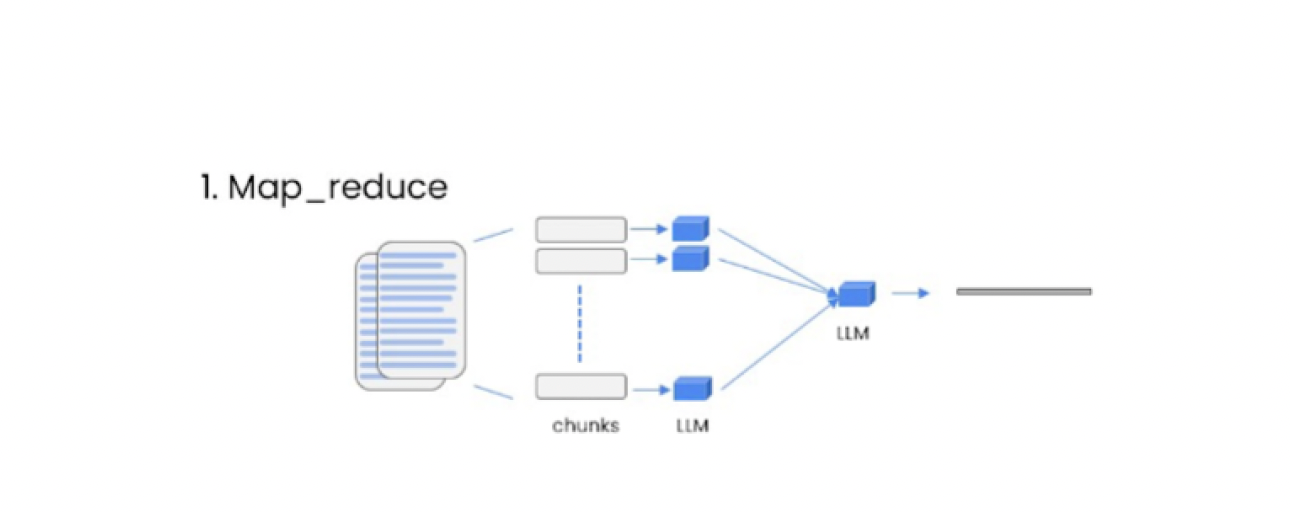

In [ ]:
from IPython import display
mp_image = path+"map-reduce.png"
display.Image(mp_image)
#source from LangChain documentation

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
  llm,
  retriever=vectordb.as_retriever(),
  chain_type="map_reduce"
)

question = "What is a deep work"
result = qa_chain({"query": question})
print(f"Answer:\n {result['result']}")

Answer:
 Deep work is a concept that involves focusing intensely on cognitively demanding tasks without distractions. It is a state of intense concentration where individuals can produce their best and most creative work by eliminating distractions and giving full attention to the task at hand in order to achieve high-quality results.


In [ ]:
result

{'query': 'What is a deep work',
 'result': 'Deep work is a concept that involves focusing intensely on cognitively demanding tasks without distractions. It is a state of intense concentration where individuals can produce their best and most creative work by eliminating distractions and giving full attention to the task at hand in order to achieve high-quality results.'}

In [ ]:
qa_chain_mr = RetrievalQA.from_chain_type(
  llm,
  retriever=vectordb.as_retriever(search_type = "mmr"),
  chain_type="map_reduce"
)

question = "What is a deep work"
result = qa_chain_mr({"query": question})
print(f"Answer:\n {result['result']}")

Answer:
 Deep work is a concept that involves dedicating focused and undistracted time and attention to work on tasks that require cognitive effort and concentration. It is a state of intense focus and concentration on demanding tasks, often leading to high-quality and productive outcomes.


**cons of map_reduce ==>**

When using map_reduce, since we send each chunk separately to the LLM, there is a possibility that our question’s answer might be divided between 2 different chuncks (at the end of one chunk and the beginning of another).

This could result in the LLM being unable to find a relevant answer,
leading to responses like “I don’t know”…

**Refine chain**

We can improve map-reduce results, by using this other chain type “refine”, which makes sequential
calls to the **OpenAI API**.

With this chain, we also call 4 times the OpenAI Chat API, but with different way than
map_reduce:

At each time we call the LLM, we give: * The current document + * the LLM’s answer from theprevious call with the previous document + * Adapt the prompt template to ask explicitly the LLM to refine the answer with the new context (current document)

Here are the steps:

**FIRST CALL**

**SYSTEM:** Context information is below ****<doc1>***

Given the context information and not prior knowledge, answer any questions

**HUMAN**:“What is a deep work”

Model ouput:

**ASSISTANT**: answer1

**SECOND CALL**: Second a sequence of messages, that contained the former answer from the model:

**HUMAN**: “What is a deep work”
**AI** (could ne assistant role): answer1

**HUMAN** (could be system role): We have the opportunity to refine the existing answer (only if needed) with some more context below.

****<doc2>****

Given the new context, refine the original answer to better answer the question. if the context isn’t useful, return the original answer.

Model output:

**ASSISTANT**: answer2

**THIRD CALL**: third sequence of messages, that contained the former answer from the model:

**HUMAN**: “What is a deep work”

**AI** (could be assistant role): answer2

**HUMAN** (could be system role): We have the opportunity to refine the existing answer (only if needed) with some more context below.

****<doc3>****

Given the new context, refine the original answer to better answer the question. if the context isn’t useful, return the original answer.

Model output:

**ASSISTANT**: answer3

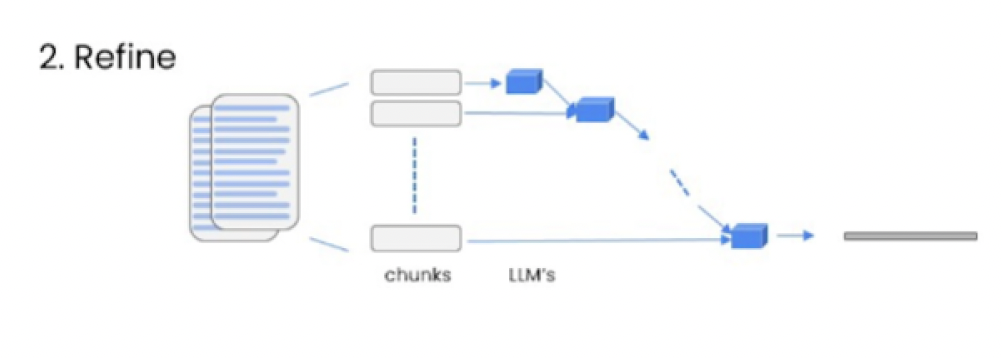

In [ ]:
from IPython import display
refine_image = path+"refine.png"
display.Image(refine_image)
#source from LangChain documentation

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
  llm,
  retriever=vectordb.as_retriever(),
  chain_type="refine"
)

question = "What is a deep work"
result = qa_chain({"query": question})
print(f"Answer:\n {result['result']}")

Answer:
 Deep work, as described by author Cal Newport, is the ability to focus without distraction on a cognitively demanding task. It involves working smarter rather than just harder, allowing individuals to produce high-quality work and achieve a state of flow. By making deep work a part of your routine, scheduling dedicated time for it, and creating a distraction-free environment, you can maximize your focus and productivity. This practice of deep work can help boost your "focus fitness" and improve your overall output, especially if you work from home or have a tendency to get distracted easily.


Refine gives better answer than map reduce. This is because we incorporate at each call the answers
coming from the previous context, which transfers information through the chain.

**Map rerank**

With map rerank, we also call the LLMs multiple times (=number of documents). The difference
with the other methods, is that we specify in the prompt to answer the question and also , specifically,
score the answer “How certain is the LMM in its answer”; Then the answer with
the highest score is returned as final answer.

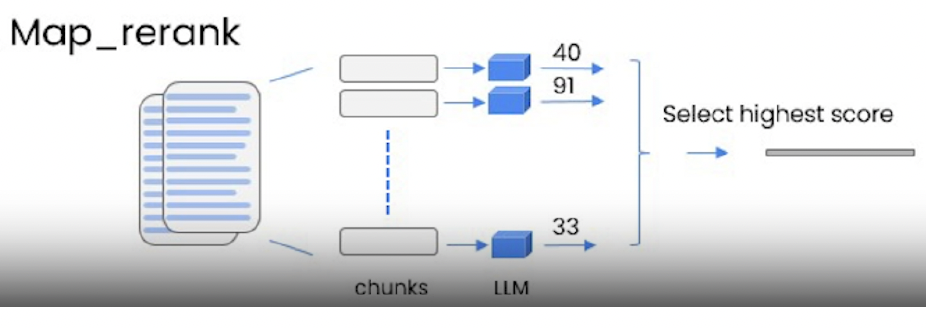

In [ ]:
from IPython import display
map_rerank_image = path+"map_rerank.png"
display.Image(map_rerank_image)
#source from LangChain documentation

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
  llm,
  retriever=vectordb.as_retriever(),
  chain_type="map_rerank"
)
question = "What is a deep work"
result = qa_chain({"query": question})
print(f"Answer:\n {result['result']}")

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:344: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


Answer:
 Deep work is the concept of focusing intensely on a cognitively demanding task without distractions. It involves working in a state of flow, where you are fully immersed in the task at hand. This type of work allows for high levels of productivity and concentration, leading to better results in a shorter amount of time.


Here are the different results:

**map_reduce: base retriever:**

Deep work refers to a state of focused and uninterrupted concentration on a cognitively demanding task. It involves working on a task without any distractions or interruptions, allowing for maximum
productivity and high-quality output. Deep work requires a state of flow, where the individual is
fully immersed in the task at hand and able to work at their highest level of cognitive ability. This
type of work is often associated with creativity, problem-solving, and producing high-value work.

**map_reduce: MMR:**

Deep work refers to the ability to focus without distraction on a cognitively demanding task. It
is a state of flow where one can fully engage in meaningful work, free from interruptions and
distractions. Deep work requires intense concentration and can lead to high-quality outputs and
significant progress in one’s work.

**refine:**

Deep work, as described by Cal Newport in his book “Deep Work,” is a concept that emphasizes the
importance of focused attention and eliminating distractions to produce high-quality and creative
work. It encourages individuals to work smarter rather than harder by prioritizing deep, concentrated
work over shallow, easily interruptible tasks. Newport provides practical tips to boost focus
and productivity, such as making deep work a routine, scheduling dedicated time for it, finding
a distraction-free environment, and practicing digital minimalism. By incorporating deep work
into their routine and creating a dedicated space, individuals can enhance their ability to produce
meaningful work and maximize their output.

**map_rerank:**

Deep Work is a guide that helps individuals regain control of their time, eliminate distractions, and
improve their overall focus. It emphasizes the importance of clear focus and careful attention in
producing the best and most creative work. Deep Work suggests that by practicing deep work and
incorporating restorative rest, individuals can enhance their ability to do meaningful work. The
book emphasizes that focus, not time, is the key to accomplishing important tasks.

**Prompt Template: Under the hood**

LangChain uses a prompt that takes into account the question and the context retrieved from
vectorestore. Here is an example how we can use your own with RetrievalQA

In [ ]:
from langchain.prompts import PromptTemplate
template = """Use the provided context to respond to the question posed at the end.
If you're unsure of the answer, please feel free to acknowledge that you don't know rather than attempting to provide a fabricated response.
Please provide a brief and concise response.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)
QA_CHAIN_PROMPT

PromptTemplate(input_variables=['context', 'question'], template="Use the provided context to respond to the question posed at the end.\nIf you're unsure of the answer, please feel free to acknowledge that you don't know rather than attempting to provide a fabricated response.\nPlease provide a brief and concise response.\n{context}\nQuestion: {question}\nHelpful Answer:")

**Use this template to ask question to the LLM**

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
  llm,
  retriever=vectordb.as_retriever(),
  return_source_documents=True,
  chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)
question = "What is a deep work"
result = qa_chain({"query": question})
print(f"Answer:\n {result['result']}")

Answer:
 Deep work is a concept that involves focusing intensely on a task without distractions in order to maximize productivity and output.


**You can see that the answer is more concise than the other examples.**